# **Importing of Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.optimizers import Adam
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

# **Data Preprocessing**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
dir = '/content/drive/MyDrive/OIDS/Classification'
animal_dir = dir + '/animal'
vehicle_dir = dir + '/vehicle'

Mounted at /content/drive


In [3]:
# initial setup
X=[]
Z=[]
IMG_SIZE=150

In [4]:
def assign_class(img, class_type):
  return class_type

In [5]:
def make_train_data(class_type, dir):
  for img in os.listdir(dir):
    print('print DIR:', dir)
    label = assign_class(img, class_type)
    path = os.path.join(dir, img) # Corrected path construction
    print(path)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    X.append(np.array(img))
    Z.append(str(label))

In [6]:
# make train data for animal class
make_train_data('animal', animal_dir)

print DIR: /content/drive/MyDrive/OIDS/Classification/animal
/content/drive/MyDrive/OIDS/Classification/animal/test_image_png_1.png
print DIR: /content/drive/MyDrive/OIDS/Classification/animal
/content/drive/MyDrive/OIDS/Classification/animal/test_image_png_2.png
print DIR: /content/drive/MyDrive/OIDS/Classification/animal
/content/drive/MyDrive/OIDS/Classification/animal/test_image_png_29.png
print DIR: /content/drive/MyDrive/OIDS/Classification/animal
/content/drive/MyDrive/OIDS/Classification/animal/test_image_png_23.png
print DIR: /content/drive/MyDrive/OIDS/Classification/animal
/content/drive/MyDrive/OIDS/Classification/animal/test_image_png_15.png
print DIR: /content/drive/MyDrive/OIDS/Classification/animal
/content/drive/MyDrive/OIDS/Classification/animal/test_image_png_22.png
print DIR: /content/drive/MyDrive/OIDS/Classification/animal
/content/drive/MyDrive/OIDS/Classification/animal/test_image_png_28.png
print DIR: /content/drive/MyDrive/OIDS/Classification/animal
/content/d

In [7]:
# make train data for vehicle class
make_train_data('vehicle', vehicle_dir)

print DIR: /content/drive/MyDrive/OIDS/Classification/vehicle
/content/drive/MyDrive/OIDS/Classification/vehicle/test_image_png_14.png
print DIR: /content/drive/MyDrive/OIDS/Classification/vehicle
/content/drive/MyDrive/OIDS/Classification/vehicle/test_image_png_39.png
print DIR: /content/drive/MyDrive/OIDS/Classification/vehicle
/content/drive/MyDrive/OIDS/Classification/vehicle/test_image_png_55.png
print DIR: /content/drive/MyDrive/OIDS/Classification/vehicle
/content/drive/MyDrive/OIDS/Classification/vehicle/test_image_png_46.png
print DIR: /content/drive/MyDrive/OIDS/Classification/vehicle
/content/drive/MyDrive/OIDS/Classification/vehicle/test_image_png_25.png
print DIR: /content/drive/MyDrive/OIDS/Classification/vehicle
/content/drive/MyDrive/OIDS/Classification/vehicle/test_image_png_43.png
print DIR: /content/drive/MyDrive/OIDS/Classification/vehicle
/content/drive/MyDrive/OIDS/Classification/vehicle/test_image_png_36.png
print DIR: /content/drive/MyDrive/OIDS/Classification/v

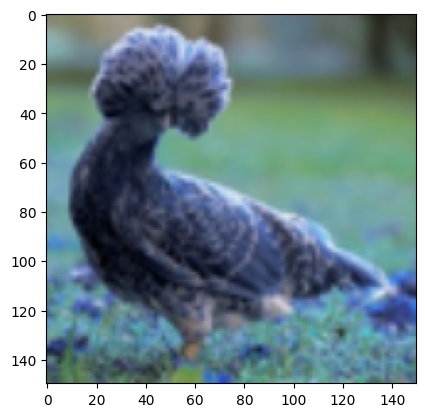

In [8]:
# confirming animal data
plt.imshow(X[3])

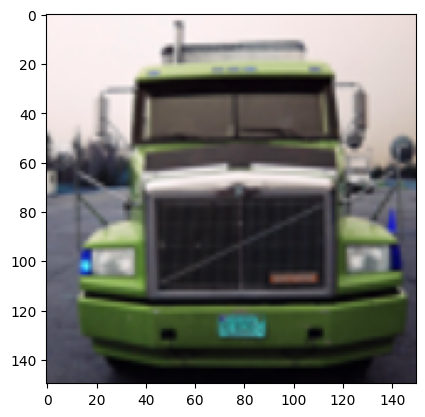

In [9]:
# confirming vehicle data
plt.imshow(X[-4])

# Encoding the label

In [10]:
# confirm label data
print(Z)

['animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal',

In [11]:
# Encode the labels
le = LabelEncoder()
Y = le.fit_transform(Z)
print(Y)

# transform X data into array and normalize pixel
X = np.array(X)
X = X / 255

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Split the data

In [12]:
# splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, train_size=0.7, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=42)

# confirm the shape
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(168, 150, 150, 3)
(36, 150, 150, 3)
(36, 150, 150, 3)


## Data Augmentation

In [13]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("verticle",
                      input_shape=(150,
                                  150,
                                  3)),
    layers.RandomFlip("horizontal",
                      input_shape=(150,
                                  150,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
  ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#**CNN Model Building**

In [14]:
# building the model
model = Sequential([
  data_augmentation,
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.GlobalAveragePooling2D(), # small dataset, therefore use this instead of flatten
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation = "sigmoid")
])

In [15]:
# compile the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
# viewing the summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,745 (577.13 KB)

 Trainable params: 147,745 (577.13 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.4592 - loss: 0.6953 - val_accuracy: 0.5833 - val_loss: 0.6879
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5101 - loss: 0.6919 - val_accuracy: 0.4167 - val_loss: 0.6931
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5291 - loss: 0.6915 - val_accuracy: 0.4167 - val_loss: 0.6972
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5167 - loss: 0.6800 - val_accuracy: 0.5833 - val_loss: 0.6587
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7116 - loss: 0.6509 - val_accuracy: 0.8333 - val_loss: 0.5644
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7279 - loss: 0.6020 - val_accuracy: 0.8333 - val_loss: 0.4566
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.6940 - loss: 0.5828 - val_accuracy: 0.8611 - val_loss: 0.4303
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7628 - loss: 0.5039 - val_accuracy: 0.6389 - val_loss: 0.5565
Epoch 9/

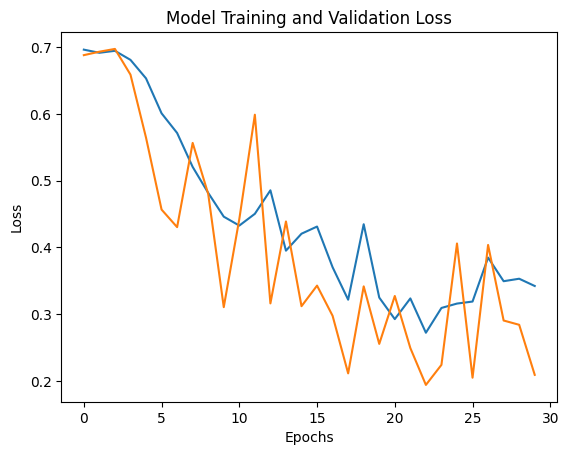

In [18]:
plt.plot(model_history.history['loss'],label='Training Loss')
plt.plot(model_history.history['val_loss'],label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

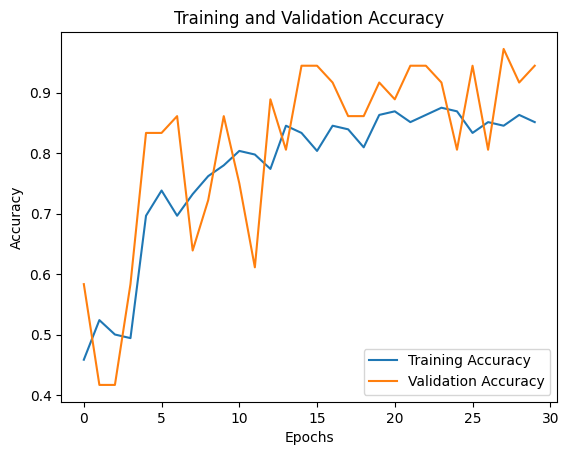

In [19]:
plt.plot(model_history.history['accuracy'],label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

## Evaluate model on test data

In [20]:
loss_metric=model.evaluate(X_test,y_test)
print(f"Test Accuracy: {loss_metric[1]*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.8947 - loss: 0.3473
Test Accuracy: 88.89%


In [21]:
def predict_type(img_number):
  img = np.array(X_test[img_number])
  img = img.reshape((1,150,150,3))
  plt.imshow(X_test[img_number])
  prediction = model.predict(img)
  print(prediction[0])
  if prediction[0] < 0.5:
    print('It is an animal')
  else:
    print('It is a vehicle')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
[0.6307668]
It is a vehicle


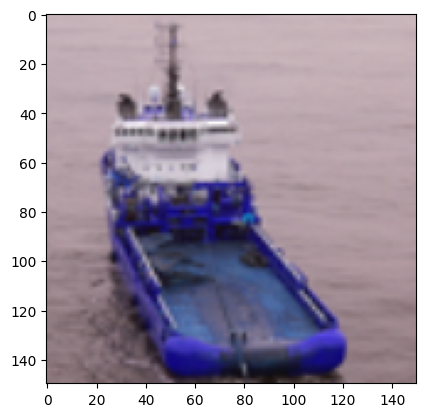

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[0.20932919]
It is an animal


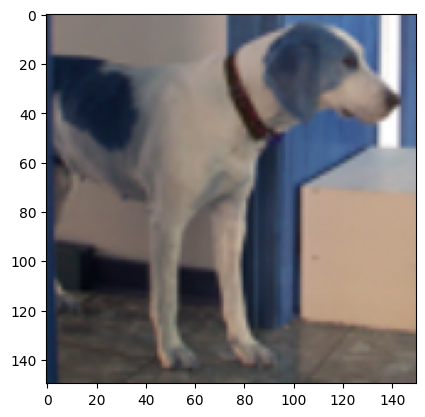

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[0.6307668]
It is a vehicle


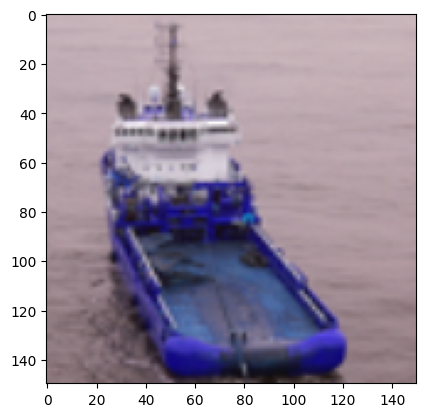

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[0.00973455]
It is an animal


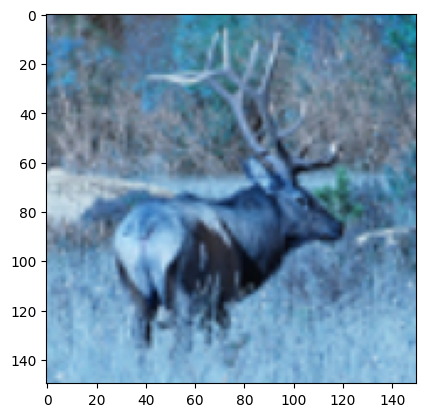

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[0.8222742]
It is a vehicle


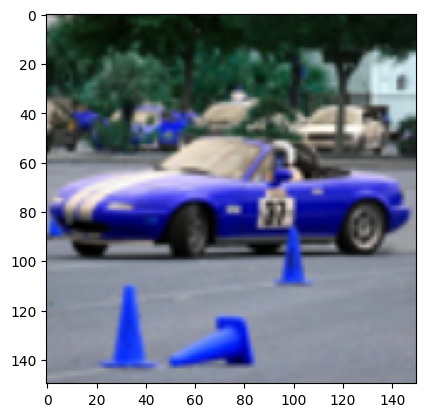

In [22]:
# Predict for 5 random images from the test set
random_indices = np.random.randint(0, len(X_test), 5)

for img_number in random_indices:
  predict_type(img_number)
  plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


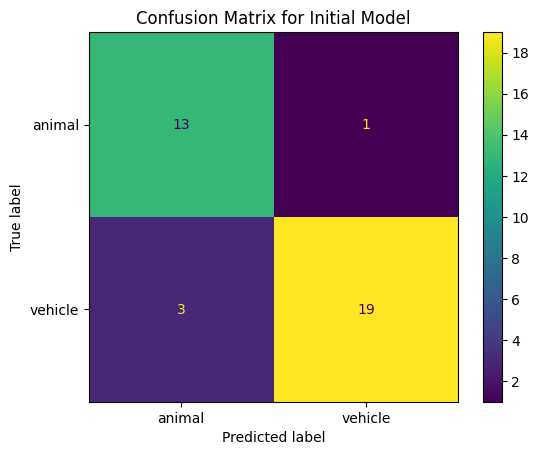

In [23]:
# Initial model confusion matrix

# Get predictions for the test set for the initial model
y_pred_initial = (model.predict(X_test) > 0.5).astype("int32")

# Create the confusion matrix for the initial model
cm_initial = confusion_matrix(y_test, y_pred_initial)

# Display the confusion matrix for the initial model
disp_initial = ConfusionMatrixDisplay(confusion_matrix=cm_initial, display_labels=['animal', 'vehicle'])
disp_initial.plot()
plt.title('Confusion Matrix for Initial Model')
plt.show()

In [24]:
# Calculate F1 score for the initial model
f1_initial = f1_score(y_test, y_pred_initial)
print(f"F1 Score for Initial Model: {f1_initial:.4f}")

F1 Score for Initial Model: 0.9048


#**Improving Accuracy**

## VGG model

In [25]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
for layer in conv_base.layers:
    layer.trainable = False

model_vgg = Sequential([
    layers.Input((150,150,3)),
    conv_base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model_vgg.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
model_vgg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
model_vgg_history = model_vgg.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 50s 8s/step - accuracy: 0.4736 - loss: 0.8087 - val_accuracy: 0.4722 - val_loss: 0.7008
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 78s 7s/step - accuracy: 0.5134 - loss: 0.7094 - val_accuracy: 0.6111 - val_loss: 0.6311
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 85s 8s/step - accuracy: 0.6065 - loss: 0.6654 - val_accuracy: 0.8611 - val_loss: 0.5787
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 48s 8s/step - accuracy: 0.7397 - loss: 0.5955 - val_accuracy: 0.8333 - val_loss: 0.5411
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 80s 8s/step - accuracy: 0.7324 - loss: 0.5942 - val_accuracy: 0.8611 - val_loss: 0.5103
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 48s 8s/step - accuracy: 0.7648 - loss: 0.5467 - val_accuracy: 0.8889 - val_loss: 0.4837
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 80s 8s/step - accuracy: 0.7666 - loss: 0.5331 - val_accuracy: 0.8889 - val_loss: 0.4608
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 83s 8s/step - accuracy: 0.7910 - loss: 0.5057 - val_accuracy: 0.9167 - val_loss: 0.4413
Epoch 9/

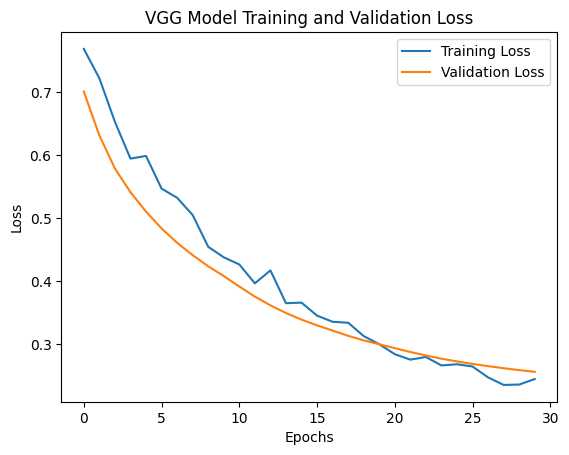

In [29]:
plt.plot(model_vgg_history.history['loss'],label='Training Loss')
plt.plot(model_vgg_history.history['val_loss'],label='Validation Loss')
plt.title('VGG Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

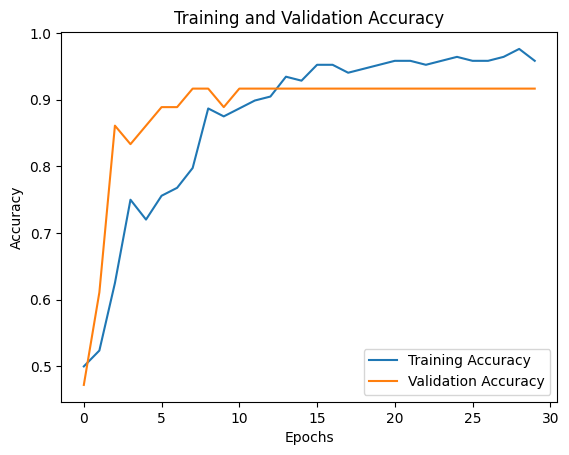

In [30]:
plt.plot(model_vgg_history.history['accuracy'],label='Training Accuracy')
plt.plot(model_vgg_history.history['val_accuracy'],label='Validation Accuracy')
plt.title('VGG Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [31]:
model_vgg_loss_metric=model_vgg.evaluate(X_test,y_test)
print(f"Test Accuracy: {model_vgg_loss_metric[1]*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 780ms/step - accuracy: 0.8657 - loss: 0.3636
Test Accuracy: 86.11%


In [32]:
def predict_type2(img_number):
  img = np.array(X_test[img_number])
  img = img.reshape((1,150,150,3))
  plt.imshow(X_test[img_number])
  prediction = model_vgg.predict(img)
  print(prediction[0])
  if prediction[0] < 0.5:
    print('It is an animal')
  else:
    print('It is a vehicle')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
[0.10023376]
It is an animal


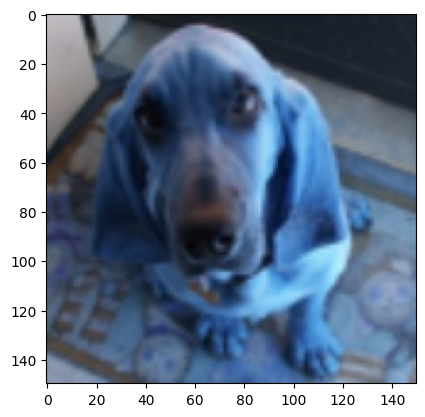

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
[0.68954295]
It is a vehicle


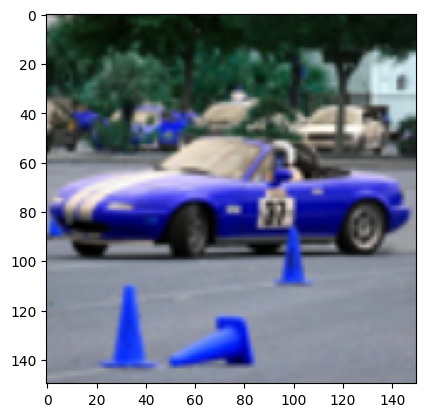

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
[0.90464795]
It is a vehicle


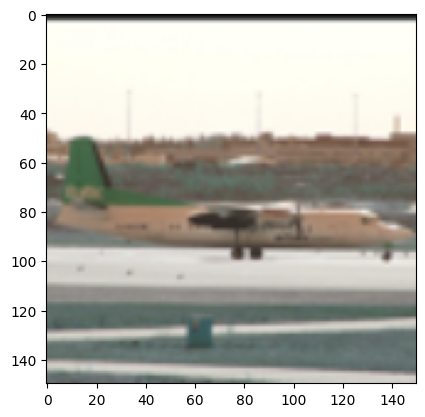

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
[0.402606]
It is an animal


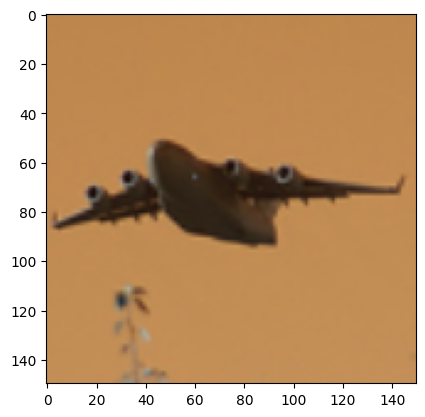

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
[0.80719763]
It is a vehicle


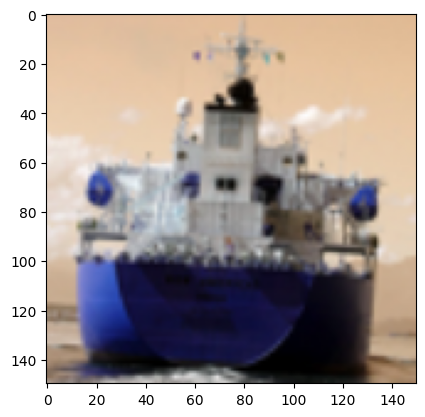

In [33]:
# Predict for 5 random images from the test set
random_indices = np.random.randint(0, len(X_test), 5)

for img_number in random_indices:
  predict_type2(img_number)
  plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 774ms/step


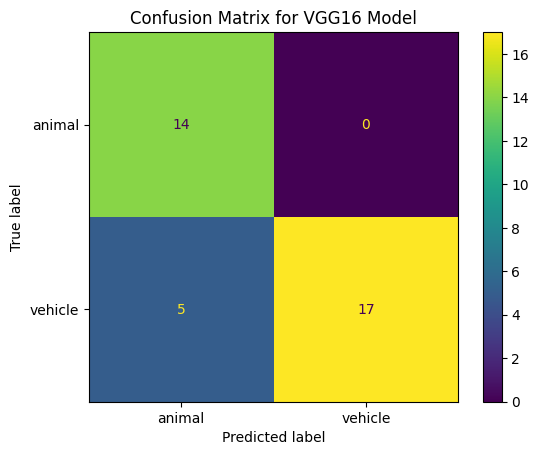

In [34]:
# Vgg model confusion matrix

# Get predictions for the test set for the VGG16 model
y_pred_vgg = (model_vgg.predict(X_test) > 0.5).astype("int32")

# Create the confusion matrix for the VGG16 model
cm_vgg = confusion_matrix(y_test, y_pred_vgg)

# Display the confusion matrix for the VGG16 model
disp_vgg = ConfusionMatrixDisplay(confusion_matrix=cm_vgg, display_labels=['animal', 'vehicle'])
disp_vgg.plot()
plt.title('Confusion Matrix for VGG16 Model')
plt.show()

In [35]:
# Calculate F1 score for the VGG16 model
f1_vgg = f1_score(y_test, y_pred_vgg)
print(f"F1 Score for VGG16 Model: {f1_vgg:.4f}")

F1 Score for VGG16 Model: 0.8718


## MobileNet

In [36]:
from keras.applications.mobilenet import MobileNet

base_layer = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

/tmp/ipython-input-2228242933.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_layer = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
for layer in base_layer.layers:
  layer.trainable = False


model_mobilenet = Sequential([
    layers.Input((150,150,3)),
    base_layer,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model_mobilenet.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
model_mobilenet.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [39]:
model_mobilenet_history = model_mobilenet.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 881ms/step - accuracy: 0.5504 - loss: 1.0813 - val_accuracy: 0.7778 - val_loss: 0.3494
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 501ms/step - accuracy: 0.6749 - loss: 0.7739 - val_accuracy: 0.9444 - val_loss: 0.2353
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 470ms/step - accuracy: 0.7994 - loss: 0.5106 - val_accuracy: 0.9722 - val_loss: 0.1686
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 624ms/step - accuracy: 0.8880 - loss: 0.3001 - val_accuracy: 0.9722 - val_loss: 0.1341
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 607ms/step - accuracy: 0.8720 - loss: 0.3406 - val_accuracy: 0.9722 - val_loss: 0.1179
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 489ms/step - accuracy: 0.9094 - loss: 0.2023 - val_accuracy: 0.9722 - val_loss: 0.1355
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 473ms/step - accuracy: 0.9452 - loss: 0.1715 - val_accuracy: 0.9444 - val_loss: 0.1464
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 762ms/step - accuracy: 0.9302 - loss: 0.2041 - val_accuracy: 0.9722 - val_loss:

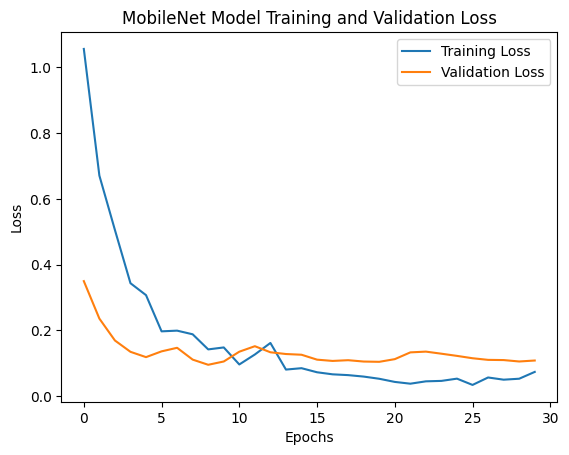

In [40]:
plt.plot(model_mobilenet_history.history['loss'],label='Training Loss')
plt.plot(model_mobilenet_history.history['val_loss'],label='Validation Loss')
plt.title('MobileNet Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

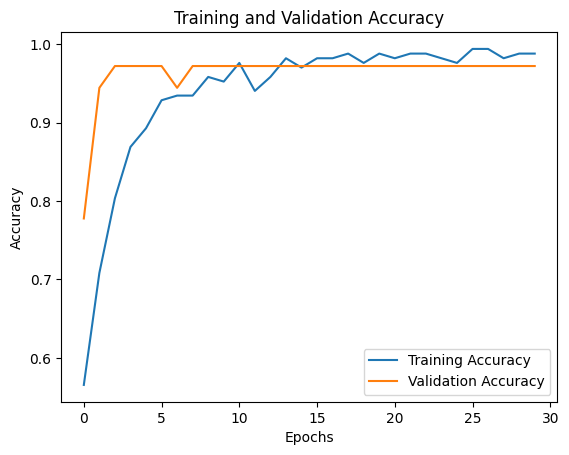

In [41]:
plt.plot(model_mobilenet_history.history['accuracy'],label='Training Accuracy')
plt.plot(model_mobilenet_history.history['val_accuracy'],label='Validation Accuracy')
plt.title('MobileNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [42]:
model_mobilenet_loss_metric=model_mobilenet.evaluate(X_test,y_test)
print(f"Test Accuracy: {model_mobilenet_loss_metric[1]*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9525 - loss: 0.4201
Test Accuracy: 94.44%


In [43]:
def predict_type3(img_number):
  img = np.array(X_test[img_number])
  img = img.reshape((1,150,150,3))
  plt.imshow(X_test[img_number])
  prediction = model_mobilenet.predict(img)
  print(prediction[0])
  if prediction[0] < 0.5:
    print('It is an animal')
  else:
    print('It is a vehicle')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
[0.8752055]
It is a vehicle


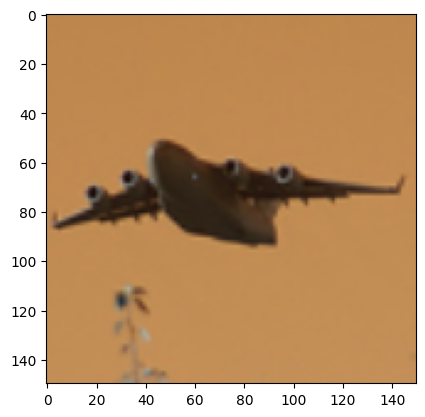

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[0.9742915]
It is a vehicle


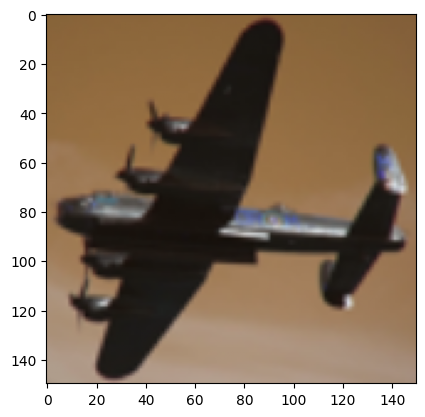

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[0.00034001]
It is an animal


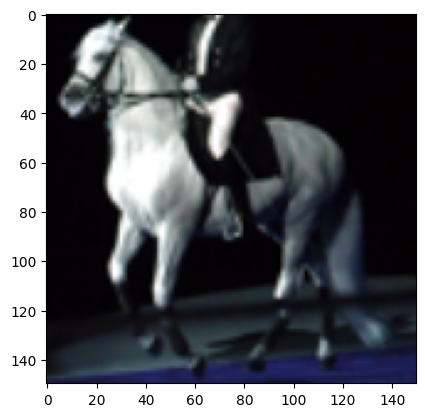

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[0.8752055]
It is a vehicle


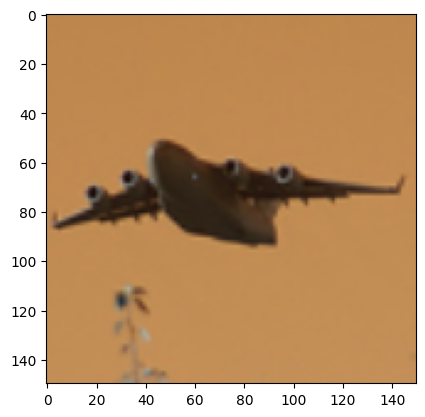

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[0.00062092]
It is an animal


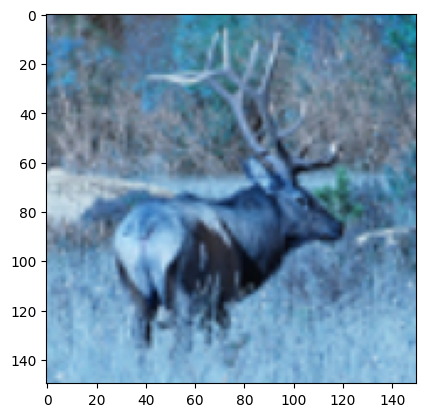

In [44]:
# Predict for 5 random images from the test set
random_indices = np.random.randint(0, len(X_test), 5)

for img_number in random_indices:
  predict_type3(img_number)
  plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


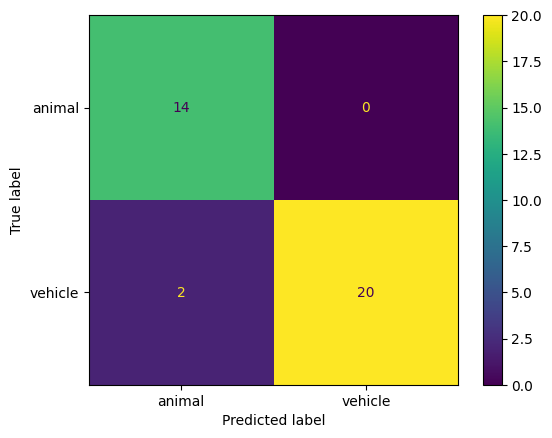

In [45]:
# MobileNet confusion matrix
# Get predictions for the test set
y_pred_mobilenet = (model_mobilenet.predict(X_test) > 0.5).astype("int32")

# Create the confusion matrix
cm_mobilenet = confusion_matrix(y_test, y_pred_mobilenet)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mobilenet, display_labels=['animal', 'vehicle'])
disp.plot()
plt.show()

In [46]:
# Calculate F1 score for the MobileNet model
f1_mobilenet = f1_score(y_test, y_pred_mobilenet)
print(f"F1 Score for MobileNet Model: {f1_mobilenet:.4f}")

F1 Score for MobileNet Model: 0.9524


## Comparing all the F1 score among all the different model

In [47]:
print(f"F1 Score for Initial Model: {f1_initial:.4f}")
print(f"F1 Score for VGG16 Model: {f1_vgg:.4f}")
print(f"F1 Score for MobileNet Model: {f1_mobilenet:.4f}")

F1 Score for Initial Model: 0.9048
F1 Score for VGG16 Model: 0.8718
F1 Score for MobileNet Model: 0.9524
